<a href="https://colab.research.google.com/github/munevardo/churn-clients/blob/main/Apredizaje_automatico_trabajo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv('https://raw.githubusercontent.com/munevardo/churn-clients/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Aquí podemos ver que se tinene un total de 7043 datos por columnas con 18 Data type tipo Object como variables categoricas y 3 variables númnericas donde 2 son enteros y Monthly chages es flotante.

In [ ]:
# Mostrar información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Estadistica descriptiva de estas 3 Columnas del Dataframe

In [ ]:
# Mostrar estadísticas descriptivas
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Representa el cargo total que el cliente ha pagado hasta la fecha por los servicios de telecomunicaciones talCharges es una métrica clave que resume el valor histórico de un cliente para la empresa y es un fuerte indicador de su antigüedad y compromiso, lo que la convierte en una variable predictiva crucial para el churn.

In [ ]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
df['tenure'].head()

,tenure
0,1
1,34
2,2
3,45
4,2


In [ ]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


## 2. Limpieza y Preprocesamiento Básico


In [ ]:
df_depurada = df.copy()

# Convertir TotalCharges a numérico, manejando errores
df_depurada['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Manejo de valores nulos
print("\n--- Valores nulos antes de la imputación ---")
print(df_depurada.isnull().sum())


--- Valores nulos antes de la imputación ---
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Imputar nulos en TotalCharges (usar la mediana o la media, o 0 si es un nuevo cliente)
# Para este dataset, los nulos en TotalCharges suelen ser clientes con tenure=0
# Se puede imputar con 0 o la mediana, dependiendo de la interpretación.
# Aquí, imputaremos con la mediana para no introducir un sesgo fuerte.
df_depurada['TotalCharges'].fillna(df_depurada['TotalCharges'].median(), inplace=True)
print("\n--- Valores nulos después de la imputación ---")
print(df_depurada.isnull().sum())


--- Valores nulos después de la imputación ---
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-1717222340.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_depurada['TotalCharges'].fillna(df_depurada['TotalCharges'].median(), inplace=True)


In [ ]:
# Eliminar customerID ya que no es útil para el modelado
df_depurada.drop('customerID', axis=1, inplace=True)

# Convertir 'No internet service' y 'No phone service' a 'No' para simplificar
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
  df_depurada[col] = df_depurada[col].replace({'No internet service': 'No'})
  df_depurada['MultipleLines'] = df_depurada['MultipleLines'].replace({'No phone service': 'No'})

# Convertir 'Yes'/'No' y 'Male'/'Female' a 1/0 para la variable objetivo y binarias
df_depurada['Churn'] = df_depurada['Churn'].map({'Yes': 1, 'No': 0})
df_depurada['gender'] = df_depurada['gender'].map({'Male': 1, 'Female': 0}) # O mantener como categórica para One-Hot

# Convertir otras columnas binarias a 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
  df_depurada[col] = df_depurada[col].map({'Yes': 1, 'No': 0})

print("\n--- Tipos de datos después de la limpieza ---")
df_depurada.info()



--- Tipos de datos después de la limpieza ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  



--- Estadísticas descriptivas de variables numéricas ---
            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   7043.000000       7043.000000     7043.000000   7043.000000   
mean       0.903166          0.592219       64.761692   2281.916928   
std        0.295752          0.491457       

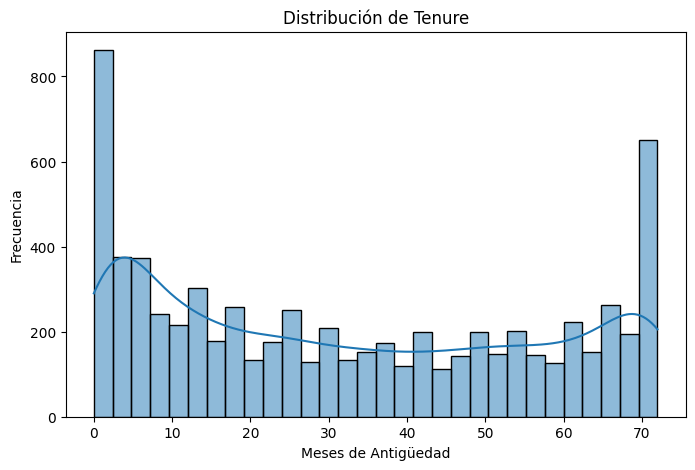


--- Conteo de Churn ---
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


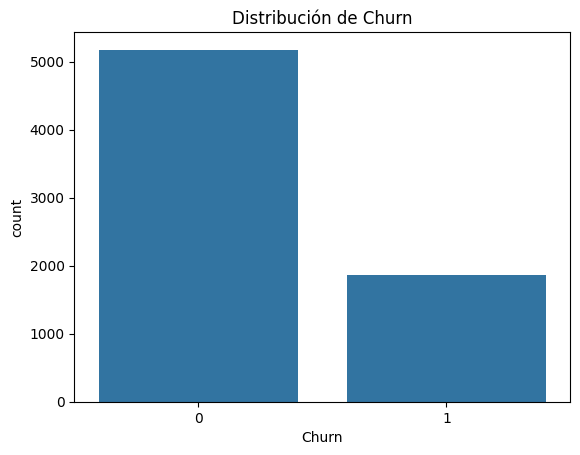

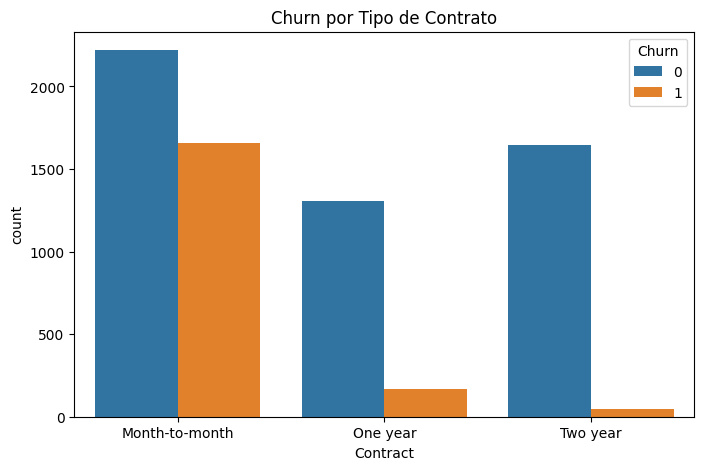

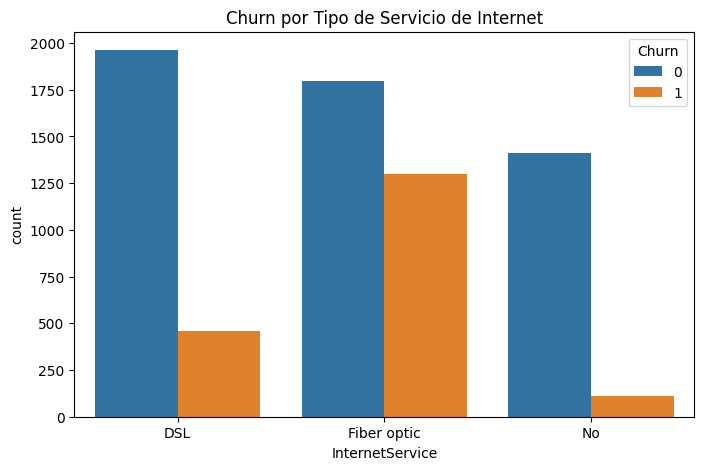

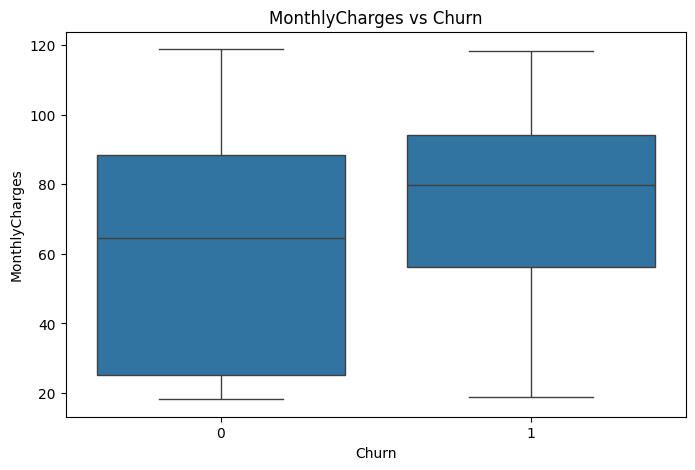

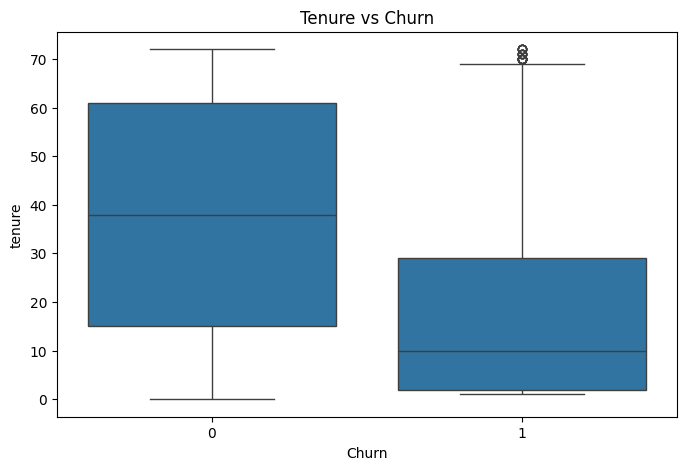

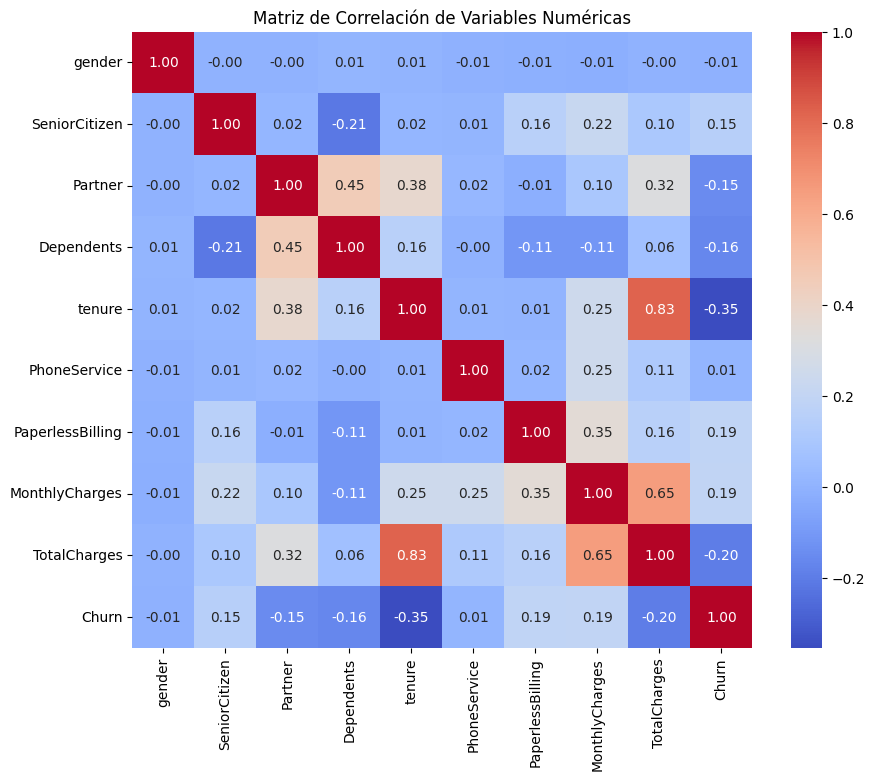


--- Conclusiones Preliminares del EDA ---
1. La columna 'TotalCharges' fue convertida a numérica y sus nulos imputados.
2. La tasa de churn es aproximadamente del 26.5%, lo que indica un desbalance de clases.
3. Los clientes con contratos mes a mes ('Month-to-month') tienen una tasa de churn significativamente más alta.
4. Los clientes con servicio de internet 'Fiber optic' muestran una mayor propensión al churn.
5. Los clientes que churnean tienden a tener una antigüedad ('tenure') menor y cargos mensuales ('MonthlyCharges') más altos.
6. Hay una fuerte correlación entre 'tenure' y 'TotalCharges'.
7. Se observan patrones interesantes en las relaciones entre servicios adicionales y churn.


In [ ]:
# 3. Análisis Descriptivo Unidimensional

print("\n--- Estadísticas descriptivas de variables numéricas ---")
print(df_depurada.describe())

# Histograma de tenure
plt.figure(figsize=(8, 5))
sns.histplot(df_depurada['tenure'], kde=True, bins=30)
plt.title('Distribución de Tenure')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Frecuencia')
plt.show()

# Conteo de Churn
print("\n--- Conteo de Churn ---")
print(df_depurada['Churn'].value_counts(normalize=True)) # Proporción de churn
sns.countplot(x='Churn', data=df_depurada)
plt.title('Distribución de Churn')
plt.show()

# 4. Análisis Descriptivo Bidimensional

# Churn por Contrato
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df_depurada)
plt.title('Churn por Tipo de Contrato')
plt.show()

# Churn por Servicio de Internet
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df_depurada)
plt.title('Churn por Tipo de Servicio de Internet')
plt.show()

# Boxplot de MonthlyCharges vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_depurada)
plt.title('MonthlyCharges vs Churn')
plt.show()

# Boxplot de Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df_depurada)
plt.title('Tenure vs Churn')
plt.show()

# Matriz de correlación para variables numéricas
numeric_df = df_depurada.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# 5. Análisis Multivariado (Ejemplo: Pairplot de algunas variables clave)
# Seleccionar algunas variables para el pairplot (puede ser lento con muchas columnas)
# selected_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'Churn']
# sns.pairplot(df[selected_cols], hue='Churn', diag_kind='kde')
# plt.suptitle('Pairplot de Variables Seleccionadas por Churn', y=1.02)
# plt.show()

# 6. Conclusiones (Ejemplo de lo que podrías escribir)
print("\n--- Conclusiones Preliminares del EDA ---")
print("1. La columna 'TotalCharges' fue convertida a numérica y sus nulos imputados.")
print("2. La tasa de churn es aproximadamente del 26.5%, lo que indica un desbalance de clases.")
print("3. Los clientes con contratos mes a mes ('Month-to-month') tienen una tasa de churn significativamente más alta.")
print("4. Los clientes con servicio de internet 'Fiber optic' muestran una mayor propensión al churn.")
print("5. Los clientes que churnean tienden a tener una antigüedad ('tenure') menor y cargos mensuales ('MonthlyCharges') más altos.")
print("6. Hay una fuerte correlación entre 'tenure' y 'TotalCharges'.")
print("7. Se observan patrones interesantes en las relaciones entre servicios adicionales y churn.")

In [ ]:

# 7. Preparación para el Modelado (Ejemplo de One-Hot Encoding)
# Identificar columnas categóricas para One-Hot Encoding
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first para evitar multicolinealidad

print("\n--- DataFrame después de One-Hot Encoding (primeras filas) ---")
print(df_encoded.head())
print(f"Dimensiones del DataFrame codificado: {df_encoded.shape}")


--- DataFrame después de One-Hot Encoding (primeras filas) ---
   SeniorCitizen  tenure  MonthlyCharges  customerID_0003-MKNFE  \
0              0       1           29.85                  False   
1              0      34           56.95                  False   
2              0       2           53.85                  False   
3              0      45           42.30                  False   
4              0       2           70.70                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0        